In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
result_ARIMA = pd.read_csv("../Arima/only_arima.csv")
result_LR = pd.read_csv("../LSTM/only_LSTM.csv")
result_XGB = pd.read_csv("../LSTM/only_XGB.csv")
result_LSTM = pd.read_csv("../LSTM/only_LSTM.csv")

In [89]:
best_ARIMA = pd.read_csv("../Arima/only_best_arima_100.csv")
best_LR = pd.read_csv("../LSTM/only_best_LSTM_100.csv")
best_XGB = pd.read_csv("../LSTM/only_best_LSTM_100.csv")
best_LSTM = pd.read_csv("../LSTM/only_best_LSTM_100.csv")

In [90]:
cu_ARIMA = result_ARIMA.filter(regex='cumulative')
cu_ARIMA['Datetime']= result_ARIMA['Unnamed: 0']
cu_ARIMA.index = cu_ARIMA['Datetime']
cu_ARIMA.index = pd.to_datetime(cu_ARIMA.index)
cu_ARIMA = cu_ARIMA.drop('2017-04-11', axis = 0)


cu_LR = result_LR.filter(regex='cumulative')
cu_LR['Datetime']= result_LR['Unnamed: 0']
cu_LR.index = cu_LR['Datetime']
cu_LR.index = pd.to_datetime(cu_LR.index)

cu_XGB = result_XGB.filter(regex='cumulative')
cu_XGB['Datetime']= result_XGB['Unnamed: 0']
cu_XGB.index = cu_XGB['Datetime']
cu_XGB.index = pd.to_datetime(cu_XGB.index)

cu_LSTM = result_LSTM.filter(regex='cumulative')
cu_LSTM['Datetime']= result_LSTM['Unnamed: 0']
cu_LSTM.index = cu_LSTM['Datetime']
cu_LSTM.index = pd.to_datetime(cu_LSTM.index)

C:\Users\happy\AppData\Local\Temp\ipykernel_16664\966872097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_ARIMA['Datetime']= result_ARIMA['Unnamed: 0']
C:\Users\happy\AppData\Local\Temp\ipykernel_16664\966872097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_LR['Datetime']= result_LR['Unnamed: 0']
C:\Users\happy\AppData\Local\Temp\ipykernel_16664\966872097.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [91]:
cu_best_ARIMA = best_ARIMA.filter(regex='cumulative')
cu_best_ARIMA['Datetime']= best_ARIMA['Unnamed: 0']
cu_best_ARIMA.index = cu_best_ARIMA['Datetime']
cu_best_ARIMA.index = pd.to_datetime(cu_best_ARIMA.index)
cu_best_ARIMA = cu_best_ARIMA.drop('2017-04-11', axis = 0)
cu_best_ARIMA.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)

cu_best_LR = best_LR.filter(regex='cumulative')
cu_best_LR['Datetime']= best_LR['Unnamed: 0']
cu_best_LR.index = cu_best_LR['Datetime']
cu_best_LR.index = pd.to_datetime(cu_best_LR.index)
cu_best_LR.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)

cu_best_XGB = best_XGB.filter(regex='cumulative')
cu_best_XGB['Datetime']= best_XGB['Unnamed: 0']
cu_best_XGB.index = cu_best_XGB['Datetime']
cu_best_XGB.index = pd.to_datetime(cu_best_XGB.index)
cu_best_XGB.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)

cu_best_LSTM = best_LSTM.filter(regex='cumulative')
cu_best_LSTM['Datetime']= best_LSTM['Unnamed: 0']
cu_best_LSTM.index = cu_best_LSTM['Datetime']
cu_best_LSTM.index = pd.to_datetime(cu_best_LSTM.index)
cu_best_LSTM.rename(columns={'cumulative_return_of_rate':'cumulative return of rate'}, inplace = True)

C:\Users\happy\AppData\Local\Temp\ipykernel_16664\2995803647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_best_ARIMA['Datetime']= best_ARIMA['Unnamed: 0']
C:\Users\happy\AppData\Local\Temp\ipykernel_16664\2995803647.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cu_best_LR['Datetime']= best_LR['Unnamed: 0']
C:\Users\happy\AppData\Local\Temp\ipykernel_16664\2995803647.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [92]:
def plot_return(AR, LR, XGB, LSTM):
    plt.figure(figsize=(20, 8))
    
    plt.subplot(241)
    plt.plot(AR.index, AR['cumulative return of rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['cumulative return of rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['cumulative return of rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['cumulative return of rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(242)
    plt.plot(AR.index, AR['ma+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "MA cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(243)
    plt.plot(AR.index, AR['rsi+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['rsi+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['rsi+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['rsi+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "RSI cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(244)
    plt.plot(AR.index, AR['noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "Noise cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(245)
    plt.plot(AR.index, AR['ma_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "MA & Noise cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(246)
    plt.plot(AR.index, AR['ma_rsi+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_rsi+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_rsi+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_rsi+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "MA & RSI cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(247)
    plt.plot(AR.index, AR['rsi_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['rsi_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['rsi_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['rsi_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "RSI & Noise cumulative_return_of_rate")
    plt.grid(True)
    
    plt.subplot(248)
    plt.plot(AR.index, AR['ma_rsi_noise+cumulative_return_of_rate'].values, label = "ARIMA", color="green") #이름으로 색 바꾸기 
    plt.plot(AR.index, LR['ma_rsi_noise+cumulative_return_of_rate'].values, label = "LR", color = "red") 
    plt.plot(AR.index, XGB['ma_rsi_noise+cumulative_return_of_rate'].values, label = "XGB", color = "blue") 
    plt.plot(AR.index, LSTM['ma_rsi_noise+cumulative_return_of_rate'].values, label = "LSTM", color = "yellow")   
    plt.legend()
    plt.title(
        "MA & RSI & Noise cumulative_return_of_rate")
    plt.grid(True)
    
    plt.show()

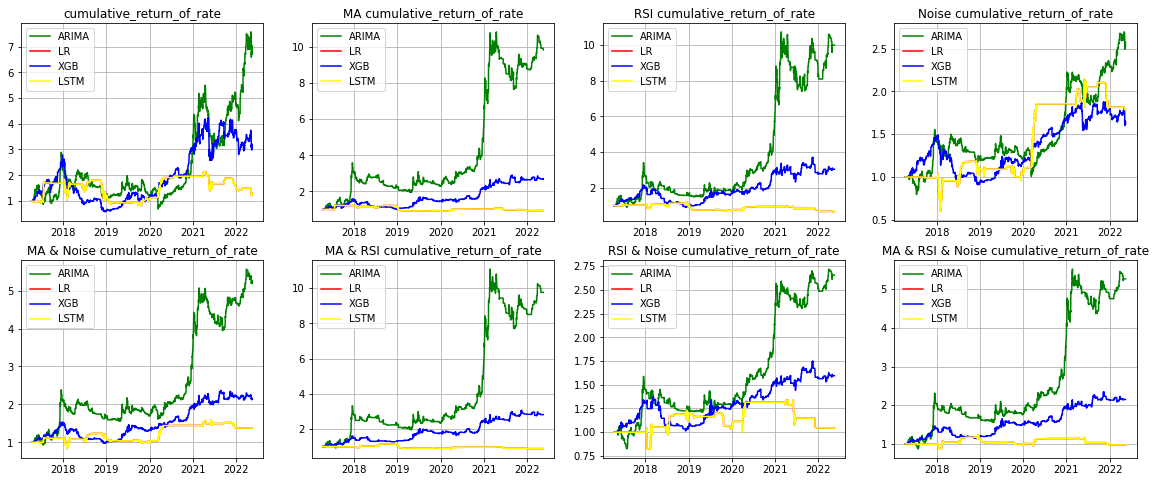

In [93]:
plot_return(cu_ARIMA, cu_LR, cu_XGB, cu_LSTM)

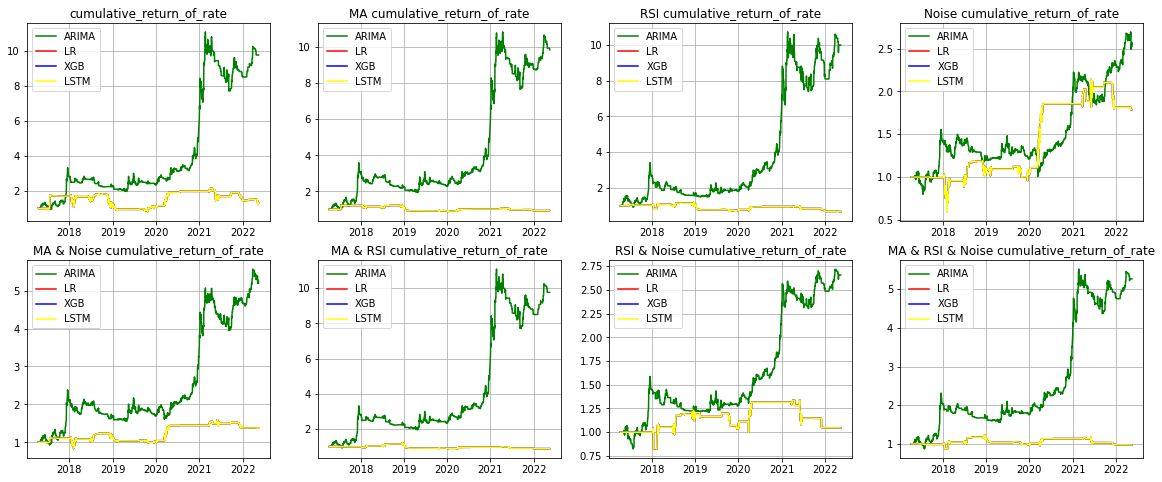

In [94]:
plot_return(cu_best_ARIMA, cu_best_LR, cu_best_XGB, cu_best_LSTM)